In [5]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import LightSource
from matplotlib.colors import ListedColormap

In [17]:
data1_1P = np.loadtxt(r"Density_matrixes\spacs_DM1.txt", dtype=np.complex128)
data2_1P = np.loadtxt(r"Density_matrixes\spacs_DM2.txt", dtype=np.complex128)

data1_2P = np.loadtxt(r"Density_matrixes\tpacs_DM1.txt", dtype=np.complex128)
data2_2P = np.loadtxt(r"Density_matrixes\tpacs_DM2.txt", dtype=np.complex128)

data1_3P = np.loadtxt(r"Density_matrixes\3pacs_DM1.txt", dtype=np.complex128)
data2_3P = np.loadtxt(r"Density_matrixes\3pacs_DM2.txt", dtype=np.complex128)

DPI=300

# Visualize Wigner functions of the states

In [9]:
'''2 Plots'''
def wigner_3d_v2(rho,rho2,N,azim=35,dist=8.5,elev=25,space=3.0,
                 padx=2,pady=4,padz=12,fontsize=16,fonttype="DejaVu Sans",
                 saveas="",cmap=plt.cm.RdYlBu_r, dp_position=-0.5,dpi=300,color_samples = 1000):

    color_off=0
    color_low_off=0.05
    color_high_off=0
    aspect=1.33
    density_alpha=0.7
    
    rho = Qobj(rho)
    # Sampling the whole Hilbert space
    samples = np.linspace(-N,N,200)
    x, p = np.meshgrid(samples, samples) 
    # Computing the Wigner function of the state
    W_fock = wigner(rho,samples,samples)
    wmin1 = 2.0*np.min(W_fock)
    wmax1 = 1.01*np.max(W_fock)
    
    rho2 = Qobj(rho2)
    # Computing the Wigner function of the state
    W_fock2 = wigner(rho2,samples,samples)
    wmin2 = 2.0*np.min(W_fock2)
    wmax2 = 1.01*np.max(W_fock2)
    
    
    if (fonttype !="" and fonttype !="Tex"):
        plt.rcParams["font.family"] = f'{fonttype}'
    if fonttype == "Tex":    
        plt.rcParams['text.usetex'] = True
    
    def my_map(number):
        result = (number - min_height) * color_norm
        if (result <= 1 and result >= 0):
            return result
        else:
            raise Exception("Number is not in the domain of the function") 
    
    # Create light source object.
    ls = LightSource(azdeg=0, altdeg=65)
    
    wmin = min(wmin1,wmin2,dp_position)
    wmin = dp_position
    wmax = max(wmax1,wmax2)
    
    min_height = min(np.min(W_fock),np.min(W_fock2))
    max_height = max(np.max(W_fock),np.max(W_fock2))
    
    color_norm = 1/(max_height-min_height)
    
    # =====================================================================
    
    # set up a figure three times as wide as it is tall
    fig = plt.figure(figsize=plt.figaspect(aspect), dpi=dpi)
    
    # =============
    # First subplot
    # =============
    # set up the axes for the first plot
    ax1 = fig.add_subplot(2, 1, 1, projection='3d')
    
    # plot a 3D surface
    range_low = my_map(np.min(W_fock))
    range_high = my_map(np.max(W_fock))
    
    new_cmap = ListedColormap(cmap(np.linspace(range_low-color_low_off,range_high+color_high_off,color_samples,100)-color_off))
    rgb = ls.shade(W_fock, new_cmap)
    
    surf1 = ax1.plot_surface(x,p, W_fock, rstride=1, cstride=1, facecolors=rgb, alpha=0.9, linewidth=0.05, vmax=0.25, vmin=-0.25)
    '''Density Plot'''
    im = ax1.contourf(x, p, W_fock, 100, zdir='z', offset=dp_position, alpha=density_alpha, cmap=new_cmap, antialiased=True)
    #ax1.contourf(x, p, W_fock, 100, zdir='x', offset=-3, alpha=1, colors='black', antialiased=True)
    

    plt.xticks([-2.5,0,2.5],fontsize=fontsize)
    plt.yticks([-2.5,0,2.5],fontsize=fontsize)
    
    ax1.tick_params('x', labelsize=fontsize, pad=padx)
    ax1.tick_params('y', labelsize=fontsize, pad=pady)
    ax1.tick_params('z', labelsize=fontsize, pad=padz)
    ax1.set_ylabel('p', fontsize=fontsize+4,labelpad=pady+pady)
    ax1.set_xlabel('x', fontsize=fontsize+4,labelpad=padx+padx)
    ax1.set_zlim([wmin, wmax])
    ax1.set_xlim([-1.01*N, 1.01*N])
    ax1.set_ylim([-1.01*N, 1.01*N])
    ax1.azim = azim
    ax1.dist = dist
    ax1.elev = elev
    
    # Get rid of colored axes planes
    # First remove fill
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    # Now set color to white (or whatever is "invisible")
    ax1.xaxis.pane.set_edgecolor('w')
    ax1.yaxis.pane.set_edgecolor('w')
    ax1.zaxis.pane.set_edgecolor('w')
    
    plt.colorbar(im,pad = 0.18,ticks=[0.3, 0.2, 0.1, 0, -0.1, -0.2])
    
    # ==============
    # Second subplot
    # ==============
    # set up the axes for the second plot
    ax = fig.add_subplot(2, 1, 2, projection='3d')
    
    # plot a 3D surface
    range_low = my_map(np.min(W_fock2))
    range_high = my_map(np.max(W_fock2))

    new_cmap = ListedColormap(cmap(np.linspace(range_low-color_low_off,range_high+color_high_off,color_samples,100)-color_off))
    rgb = ls.shade(W_fock2, new_cmap)
    
    surf2 = ax.plot_surface(x,p, W_fock2, rstride=1, cstride=1, facecolors=rgb, alpha=0.9, linewidth=0.05, vmax=0.25, vmin=-0.25)
    '''Density Plot'''
    im = ax.contourf(x, p, W_fock2, 100, zdir='z', offset=dp_position, alpha=density_alpha, cmap=new_cmap, antialiased=True)
    
    plt.xticks([-2.5,0,2.5],fontsize=fontsize)
    plt.yticks([-2.5,0,2.5],fontsize=fontsize)
   
    ax.tick_params('x', labelsize=fontsize, pad=padx)
    ax.tick_params('y', labelsize=fontsize, pad=pady)
    ax.tick_params('z', labelsize=fontsize, pad=padz)
    ax.set_ylabel('p', fontsize=fontsize+4,labelpad=pady+pady)
    ax.set_xlabel('x', fontsize=fontsize+4,labelpad=padx+padx)
    ax.set_zlim([wmin, wmax])
    ax.set_xlim([-1.01*N, 1.01*N])
    ax.set_ylim([-1.01*N, 1.01*N])
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    
    # Get rid of colored axes planes
    # First remove fill
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    
    plt.colorbar(im,pad = 0.18,ticks=[0.3, 0.2, 0.1, 0, -0.1, -0.2])
    # ==================================================================================================

    if saveas !="":
        plt.savefig(f'{saveas}', dpi=dpi, bbox_inches = 'tight')
    plt.rcParams["font.family"] = 'DejaVu Sans'
    plt.rcParams['text.usetex'] = False

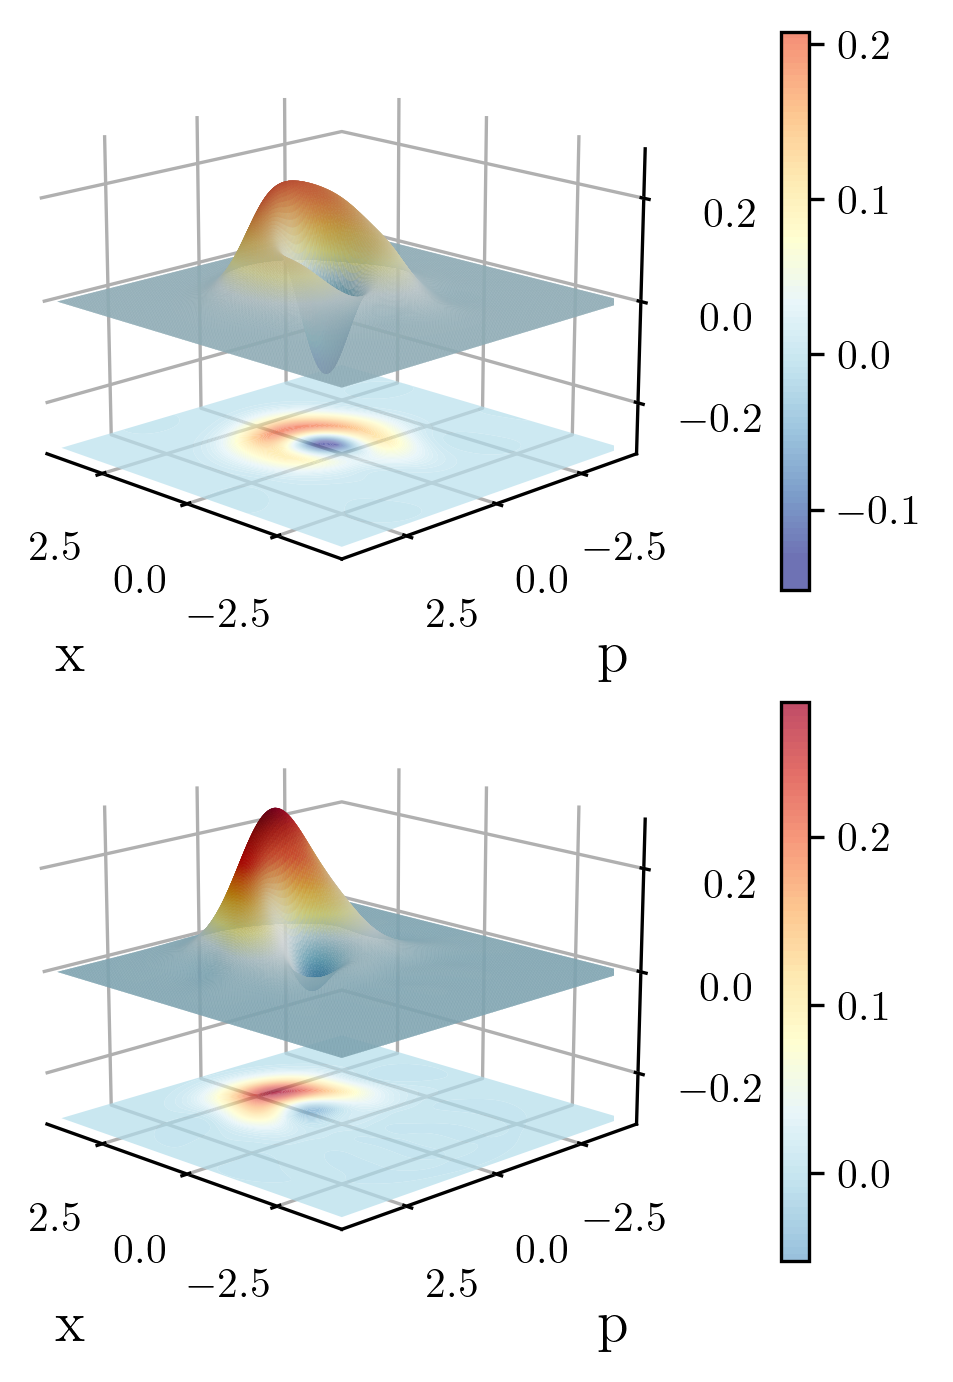

In [18]:
# Empty string will cause the script not to save the figure.
# If you want to save the figure, fill in the file name and the file type (i.e. .png, .svg)
filename = ""

%matplotlib inline
wigner_3d_v2(data1_1P,data2_1P,4,pady=2,azim=135,dist=8.5,elev=16,
               space=2,padx=2,padz=2,fontsize=10,fonttype = "Tex",
             saveas=filename,dp_position=-0.29,dpi=DPI,cmap=plt.cm.RdYlBu_r)

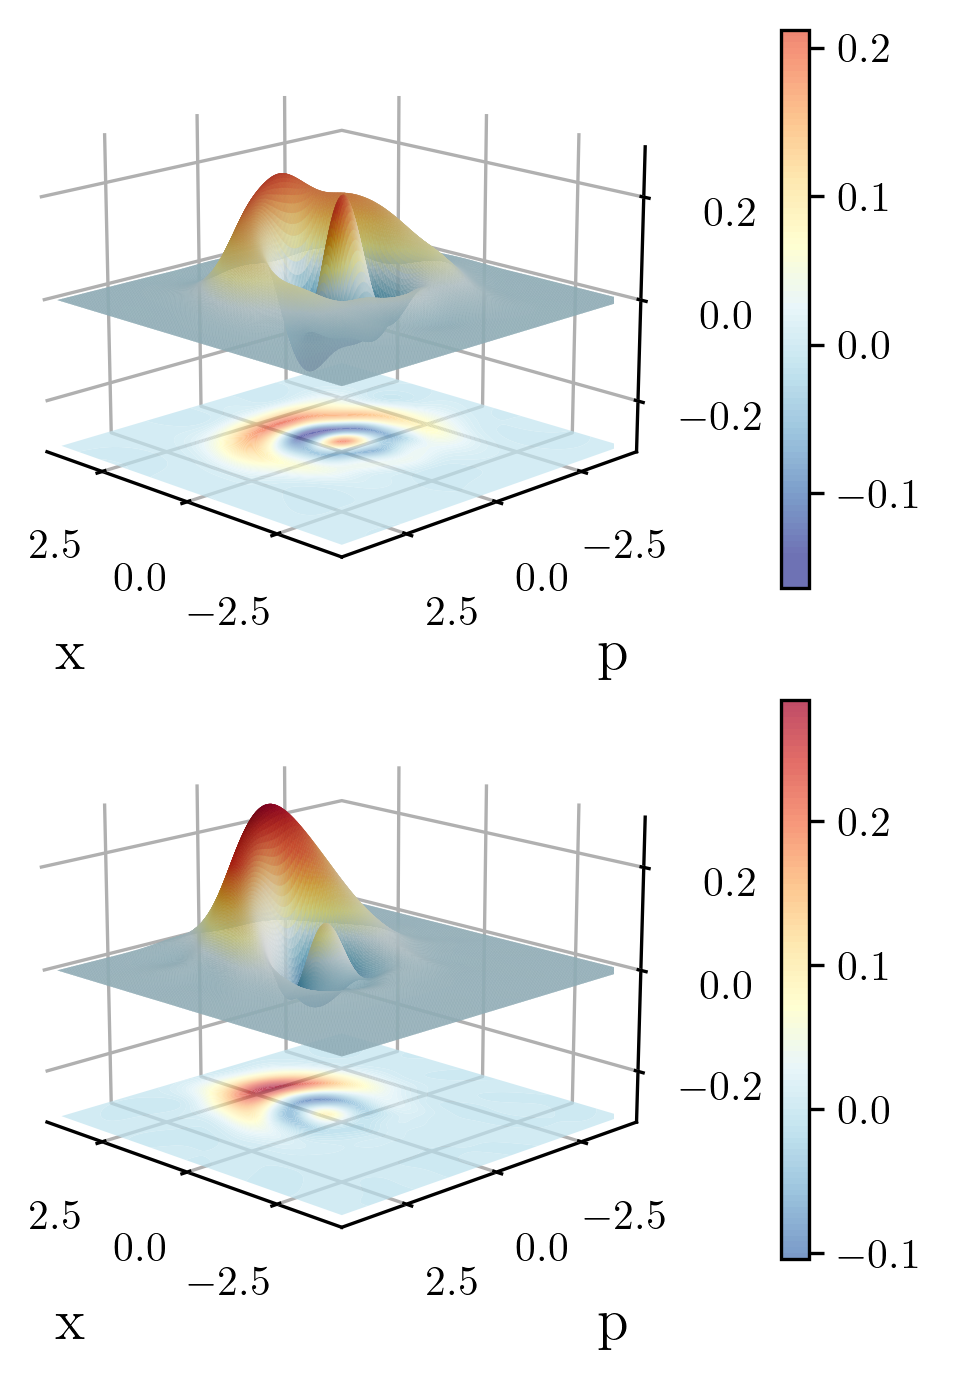

In [19]:
# Empty string will cause the script not to save the figure.
# If you want to save the figure, fill in the file name and the file type (i.e. .png, .svg)
filename = ""

%matplotlib inline
wigner_3d_v2(data1_2P,data2_2P,4,pady=2,azim=135,dist=8.5,elev=16,
               space=2,padx=2,padz=2,fontsize=10,fonttype = "Tex",
             saveas=filename,dp_position=-0.29,dpi=DPI,cmap=plt.cm.RdYlBu_r)

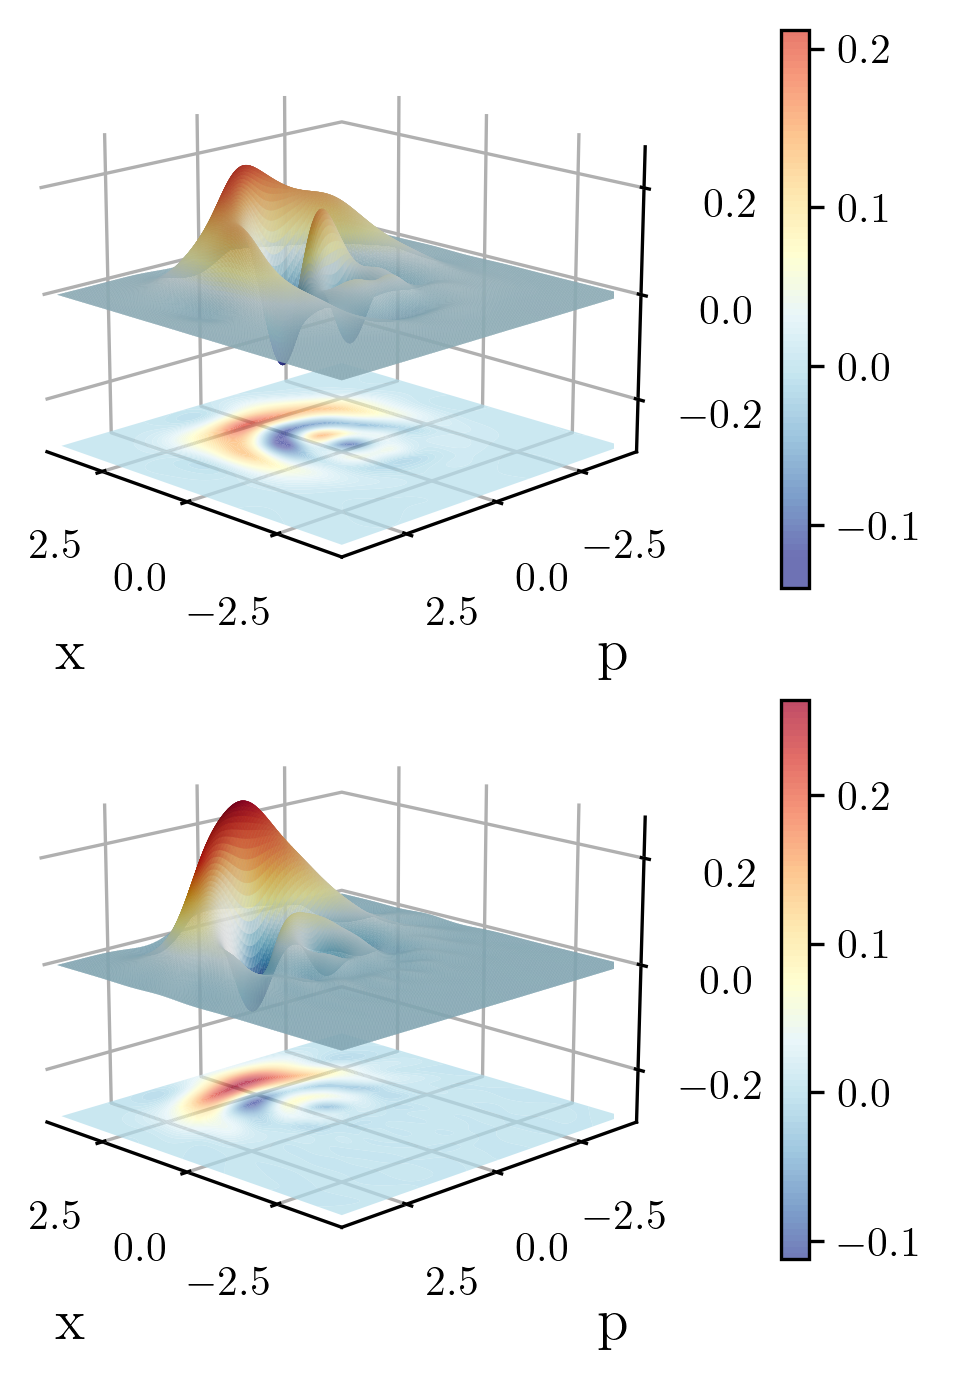

In [16]:
# Empty string will cause the script not to save the figure.
# If you want to save the figure, fill in the file name and the file type (i.e. .png, .svg)
filename = ""

%matplotlib inline
wigner_3d_v2(data1_3P,data2_3P,4,pady=2,azim=135,dist=8.5,elev=16,
               space=2,padx=2,padz=2,fontsize=10,fonttype = "Tex",
             saveas=filename,dp_position=-0.29,dpi=DPI,cmap=plt.cm.RdYlBu_r)